## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date 

## Load The Data

In [2]:
df = pd.read_csv("RawData/df_step2_features.csv")

In [3]:
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature_Bastia_Umbra,Temperature_Petrignano,Drainage_Volume,River_Hydrometry,Day,Month,Year
0,2009-01-01,0.0,-31.14,5.2,4.9,-24530.688,2.4,1,1,2009
1,2009-01-02,0.0,-31.11,2.3,2.5,-28785.888,2.5,2,1,2009
2,2009-01-03,0.0,-31.07,4.4,3.9,-25766.208,2.4,3,1,2009
3,2009-01-04,0.0,-31.05,0.8,0.8,-27919.296,2.4,4,1,2009
4,2009-01-05,0.0,-31.01,-1.9,-2.1,-29854.656,2.3,5,1,2009


In [4]:
df.shape

(4199, 10)

## Stationarity

Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

1. constant mean and mean is not time-dependent
2. constant variance and variance is not time-dependent
3. constant covariance and covariance is not time-dependent

The check for stationarity can be done via three different approaches:

1. visually: plot time series and check for trends or seasonality
2. basic statistics: split time series and compare the mean and variance of each partition
3. statistical test: Augmented Dickey Fuller test

ConversionError: Failed to convert value(s) to axis units: datetime.date(2009, 1, 1)

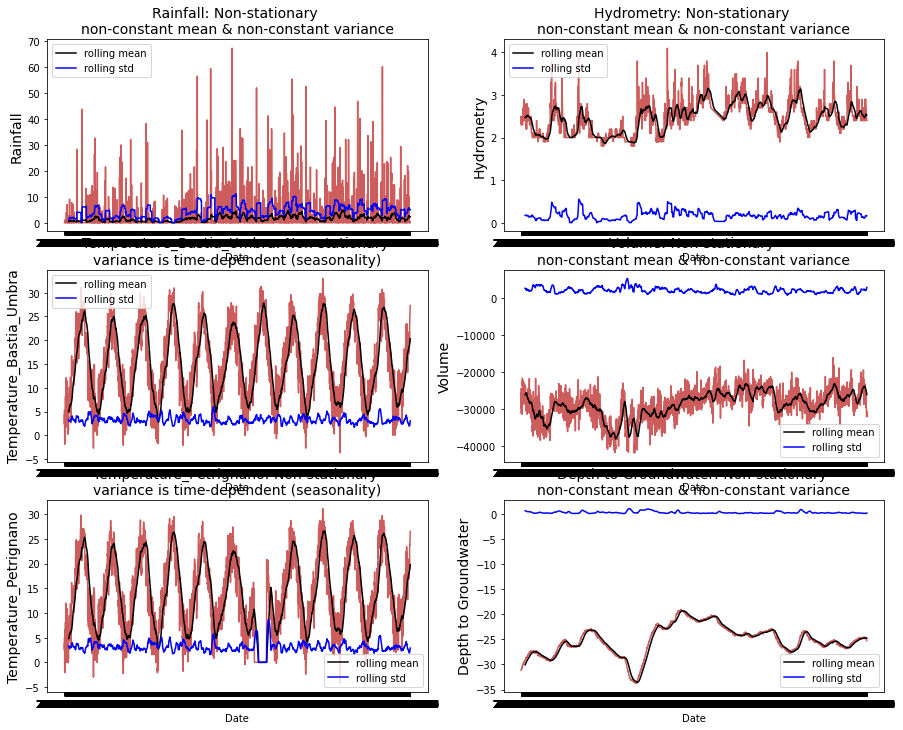

In [5]:
# A year has 52 weeks (52 weeks * 7 days per week) approx.
rolling_window = 52
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))


sns.lineplot(x=df.Date, y=df.Rainfall, ax=ax[0, 0], color='indianred')
sns.lineplot(x=df.Date, y=df.Rainfall.rolling(rolling_window).mean(), ax=ax[0, 0], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Rainfall.rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
ax[0, 0].set_title('Rainfall: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='Rainfall', fontsize=14)

sns.lineplot(x=df.Date, y=df.Temperature_Bastia_Umbra, ax=ax[1, 0], color='indianred')
sns.lineplot(x=df.Date, y=df.Temperature_Bastia_Umbra.rolling(rolling_window).mean(), ax=ax[1, 0], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Temperature_Bastia_Umbra.rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
ax[1, 0].set_title('Temperature_Bastia_Umbra: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1, 0].set_ylabel(ylabel='Temperature_Bastia_Umbra', fontsize=14)

sns.lineplot(x=df.Date, y=df.Temperature_Petrignano, ax=ax[2, 0], color='indianred')
sns.lineplot(x=df.Date, y=df.Temperature_Petrignano.rolling(rolling_window).mean(), ax=ax[2, 0], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Temperature_Petrignano.rolling(rolling_window).std(), ax=ax[2, 0], color='blue', label='rolling std')
ax[2, 0].set_title('Temperature_Petrignano: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[2, 0].set_ylabel(ylabel='Temperature_Petrignano', fontsize=14)

sns.lineplot(x=df.Date, y=df.River_Hydrometry, ax=ax[0, 1], color='indianred')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.rolling(rolling_window).mean(), ax=ax[0, 1], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
ax[0, 1].set_title('Hydrometry: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=df.Date, y=df.Drainage_Volume, ax=ax[1, 1], color='indianred')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.rolling(rolling_window).mean(), ax=ax[1, 1], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
ax[1, 1].set_title('Volume: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater, ax=ax[2, 1], color='indianred')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater.rolling(rolling_window).mean(), ax=ax[2, 1], color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater.rolling(rolling_window).std(), ax=ax[2, 1], color='blue', label='rolling std')
ax[2, 1].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[2, 1].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

i = 0
for i in range(2):
    ax[i,0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i,1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()